# Histogram-based processing

## 2.1 
(1 point) In the discrete setting, implement a Python function that, for a given
histogram of a grayscale image, computes its cumulative histogram (you may
use the numpy.cumsum function and normalize the expression).

In [2]:
import numpy as np

def compute_cumu_hist(hist):
    return np.cumsum(hist)/np.sum(hist)

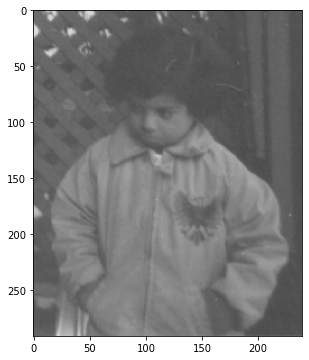

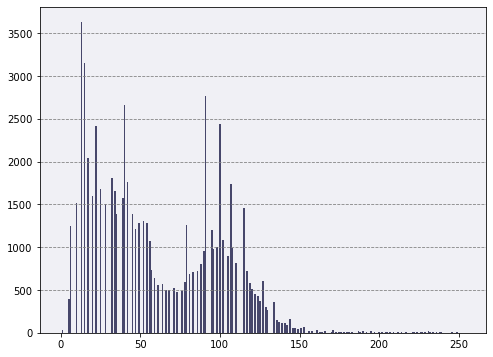

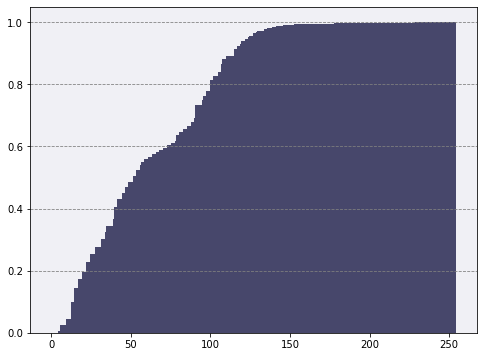

In [14]:
from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from os import makedirs
from os.path import join
plt.rcParams["figure.figsize"] = (8,6)

def bar_plot(xs, ys, title=None, filepath=None):
    fig, ax = plt.subplots()
    ax.bar(xs, ys, color='#47476b', width=1.0)
    ax.set_facecolor("#f0f0f5")
    ax.yaxis.grid(color='gray', linestyle='dashed')
    if title:
        ax.set_title(title)
    if filepath:
        fig.savefig(filepath, bbox_inches='tight')
    plt.show()
    return fig, ax

#Example usage
images_dir = "images"
output_dir = "output/ex2"
makedirs(output_dir, exist_ok = True)

img = imread(join(images_dir, "pout.tif"))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

imsave(join(output_dir, "pout.png"), img)

#Assumes 8-bit quantization
hist, _ = np.histogram(img, bins=255)
cumu_hist = compute_cumu_hist(hist)

hist_fig, _ = bar_plot(np.arange(0,255), hist)
hist_fig.savefig(join(output_dir, "pout_hist.pdf"), bbox_inches='tight')

cumu_hist_fig, _ = bar_plot(np.arange(0,255), cumu_hist)
cumu_hist_fig.savefig(join(output_dir, "pout_cumu_hist.pdf"), bbox_inches='tight')

# 2.2
(1 point) Given an image I and its CDF C, write a Python function that
computes the floating-point image C(I) such that the intensity at each pixel (x, y) is C(I(x, y)).

In [4]:
def cdf_image(img, cdf):
    cdf_img = cdf[img]
    return cdf_img

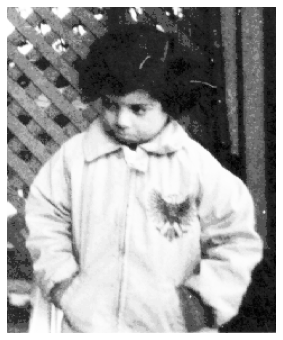

In [5]:
fig, ax = plt.subplots()
ax.imshow(cdf_image(img, cumu_hist), cmap="gray")
ax.axis("off")
fig.savefig(join(output_dir, "cdf_img.pdf"), bbox_inches='tight')

# 2.3
... Write a Python function that computes the pseudo-inverse of
any given CDF (you may use numpy.min or numpy.where function).

In [6]:
def cdf_inv(cdf, l):
    s = np.arange(0,len(cdf))
    return np.min(s[cdf[s] >= l])

In [7]:
#Quick test
test_cdf = np.array([0.1,0.3,0.5,0.75,1.0])
input_ = np.array([1.0, 0.75, 0.3, 0.5, 0.1])
expected = np.array([4,3,1,2,0])
output_ = np.zeros(input_.shape, dtype=np.int32)
for i in range(len(input_)):
    output_[i] = cdf_inv(test_cdf, input_[i])
print(expected)
print(output_)
expected==output_

[4 3 1 2 0]
[4 3 1 2 0]


array([ True,  True,  True,  True,  True])

# 2.4
... implement your own
Python function to perform histogram matching between two images.

In [8]:
#Assume gray-scale images
def hist_matching(cdf1, cdf2, img1):
    cdf2_inv_img = np.zeros(img1.shape, dtype=np.int64)
    for i in range(img1.shape[0]):
        if len(img1.shape) > 1:
            for j in range(img1.shape[1]):
                cdf2_inv_img[i,j] = cdf_inv(cdf2, cdf1[img1][i,j])
        else:
            cdf2_inv_img[i] = cdf_inv(cdf2, cdf1[img1][i])
    return cdf2_inv_img

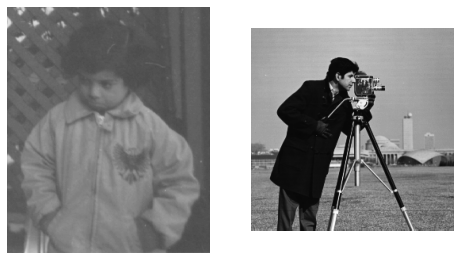

dtype of new: int64


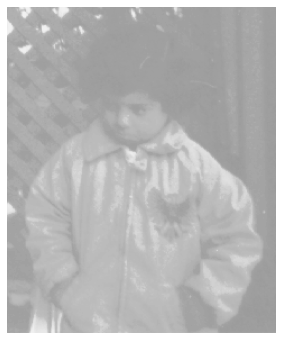

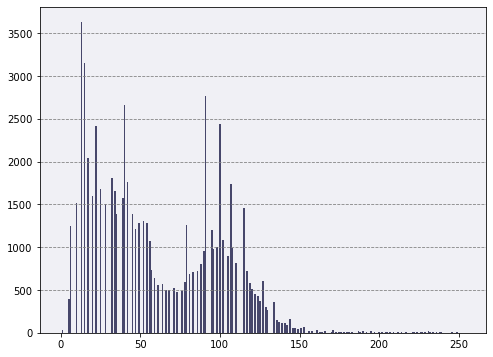

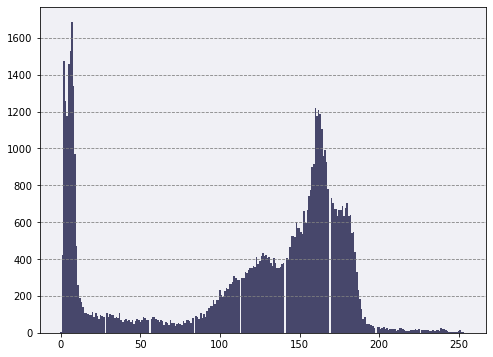

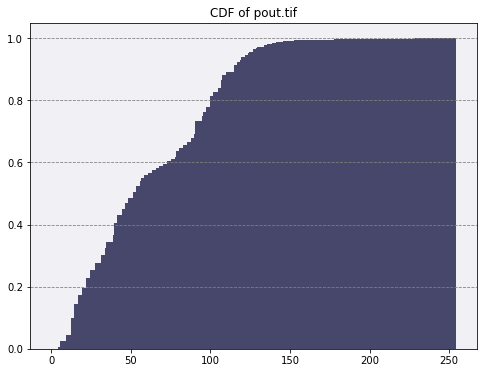

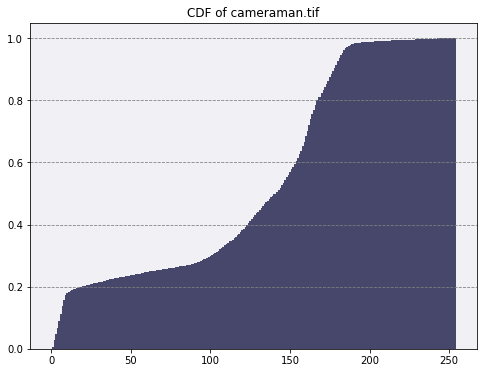

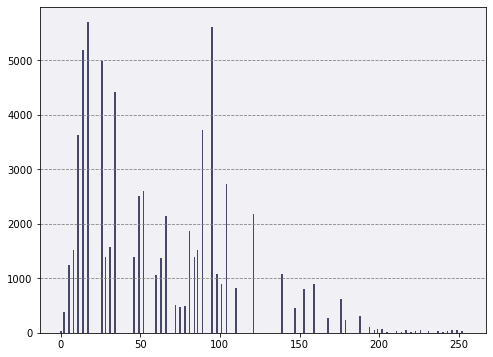

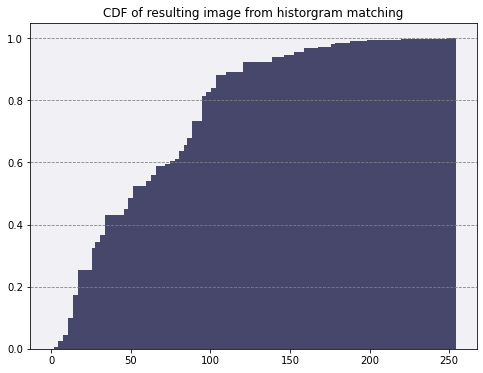

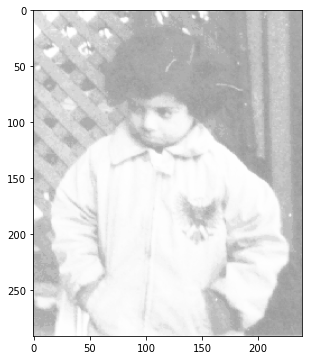

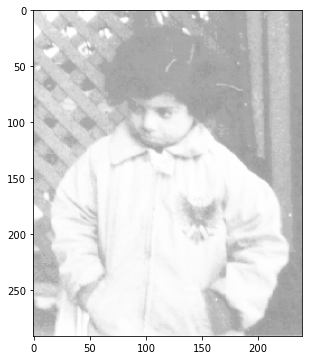

min(cdf2[hist_matched_img])=0.6046295166015625, max(cdf2[hist_matched_img])=0.998809814453125
min(cdf1[img1])=0.6032646048109965, max(cdf1[img1])=0.998754295532646


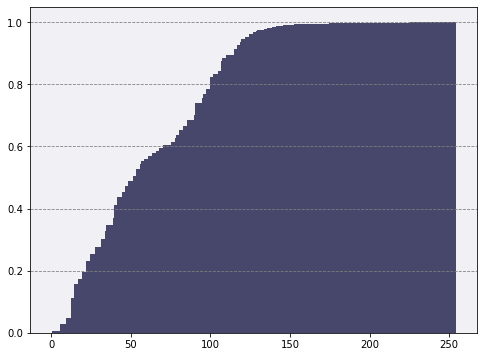

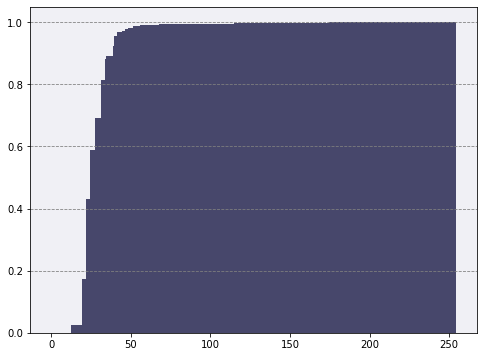

In [22]:
#Perform histogram matching on two images
img1 = imread(join(images_dir, "pout.tif"))
img2 = imread(join(images_dir, "cameraman.tif"))
imsave("cameraman.png", img2)
fig, axs = plt.subplots(1,2)
axs[0].imshow(img1, cmap="gray", vmin=0, vmax=255)
axs[0].axis("off")
axs[1].imshow(img2, cmap="gray", vmin=0, vmax=255)
axs[1].axis("off")
plt.show()

hist1, _ = np.histogram(img1, bins=255)
cdf1 = compute_cumu_hist(hist1)
hist2, _ = np.histogram(img2, bins=255)
cdf2 = compute_cumu_hist(hist2)

hist_matched_img = hist_matching(cdf1, cdf2, img1)
print(f"dtype of new: {hist_matched_img.dtype}")
plt.imshow(hist_matched_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.savefig(join(output_dir, "matched_img.pdf"), bbox_inches='tight')
plt.show()

#Plot histograms of images
hist1_fig, _ = bar_plot(np.arange(0,255), hist1)
hist2_fig, _ = bar_plot(np.arange(0,255), hist2)
cdf1_fig, ax1 = bar_plot(np.arange(0,255), cdf1, title="CDF of pout.tif", filepath=join(output_dir, "poutCDF.pdf"))
cdf2_fig, ax2 = bar_plot(np.arange(0,255), cdf2, title="CDF of cameraman.tif", filepath=join(output_dir, "cameramanCDF.pdf"))

hist3, _ = np.histogram(hist_matched_img, bins=255)
cdf3 = compute_cumu_hist(hist3)

hist3_fig, _ = bar_plot(np.arange(0,255), hist3)
cdf3_fig, _ = bar_plot(np.arange(0,255), cdf3, title="CDF of resulting image from historgram matching", filepath=join(output_dir, "matchedCDF.pdf"))

plt.imshow(cdf2[hist_matched_img], cmap="gray", vmin=0, vmax=1)
plt.show()
plt.imshow(cdf1[img1], cmap="gray", vmin=0, vmax=1)
plt.show()
print(f"min(cdf2[hist_matched_img])={np.min(cdf2[hist_matched_img])}, max(cdf2[hist_matched_img])={np.max(cdf2[hist_matched_img])}")
print(f"min(cdf1[img1])={np.min(cdf1[img1])}, max(cdf1[img1])={np.max(cdf1[img1])}")

s= np.arange(0,255)
hist_matched_ran = hist_matching(cdf1, cdf2, s)
xxx_fig, _ = bar_plot(np.arange(0,255), cdf2[hist_matched_ran])
xxx2_fig, _ = bar_plot(np.arange(0,255), cdf1[hist_matched_ran])
#print(f"Diff: {np.abs()}")

In [ ]:
aa = np.array([1,2,3])
bb = np.array([[0,2], [1,2]])
len(bb.shape)

# 2.5
(1 point) Apply your histogram matching function in the particular case where
the target CDF is the CDF corresponding to a constant histogram (a uniform
distribution).

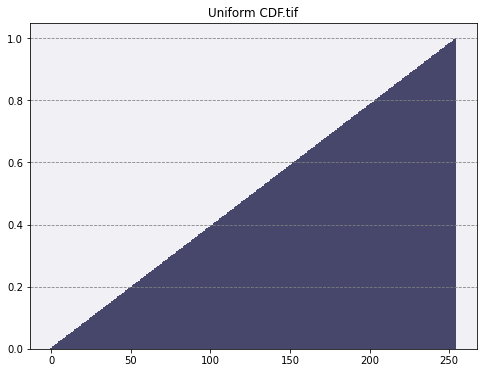

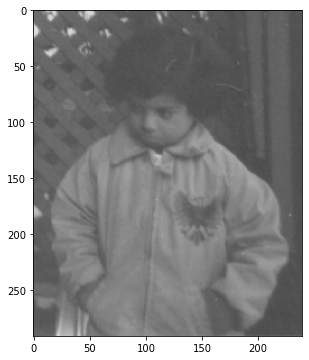

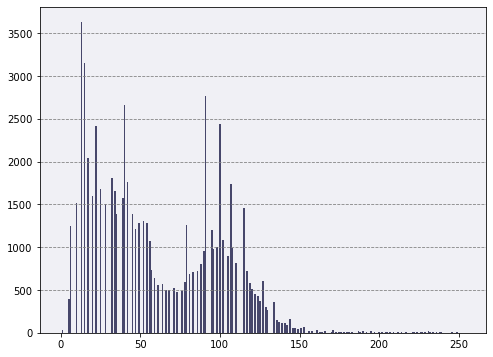

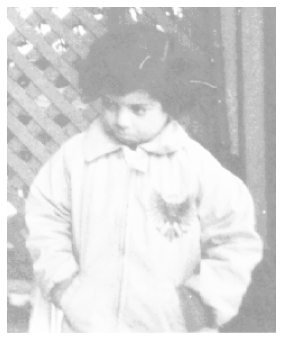

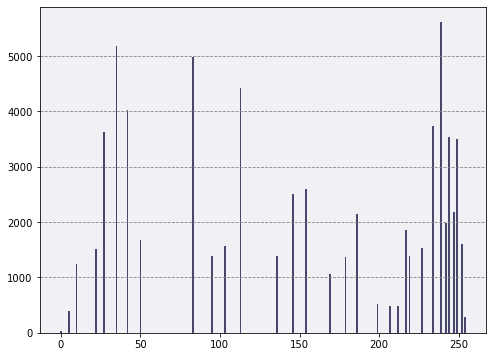

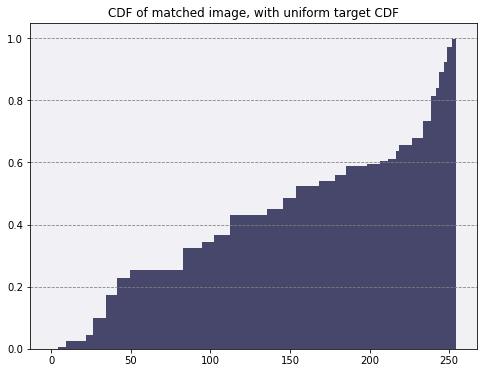

In [26]:
#Construct constant target histogram
uniform_hist = np.full(255, 1/255)
uniform_cdf = compute_cumu_hist(uniform_hist)
_, _ = bar_plot(np.arange(0,255), uniform_cdf, title="Uniform CDF.tif", filepath=join(output_dir, "uniformCDF.pdf"))
plt.show()

plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.show()
hist_img1, _ = np.histogram(img1, bins=255)
_, _ = bar_plot(np.arange(0,255), hist_img1)
plt.show()

matched_img = hist_matching(cdf1, uniform_cdf, img1)
plt.imshow(matched_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.savefig(join(output_dir, "matched_img_uniform.pdf"), bbox_inches='tight')

plt.show()
hist_matched_img, _ = np.histogram(matched_img, bins=255)
cdf_matched_img = compute_cumu_hist(hist_matched_img)

_, _ = bar_plot(np.arange(0,255), hist_matched_img)
_, _ = bar_plot(np.arange(0,255), cdf_matched_img, title="CDF of matched image, with uniform target CDF", filepath=join(output_dir, "CDF_uniformMatchedImg.pdf"))
plt.show()

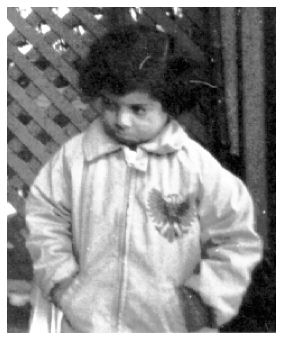

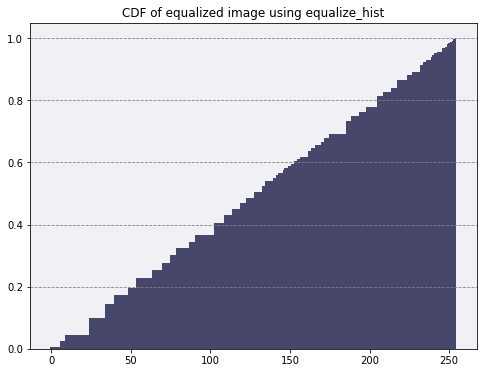

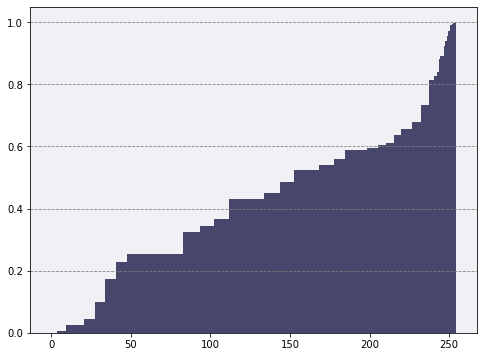

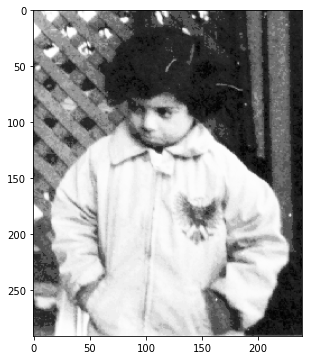

In [38]:
#Compare results with the output of equalize_hist
from skimage.exposure import equalize_hist
from skimage import img_as_float
img_float = img_as_float(img1)
equalized_img = equalize_hist(img_float, 255)
plt.imshow(equalized_img, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.savefig(join(output_dir, "equalized_img_skimage.pdf"), bbox_inches='tight')
plt.show()

hist_eq_img_skimage, _ = np.histogram(equalized_img, bins=255)
cdf_eq_img = compute_cumu_hist(hist_eq_img_skimage)
_, _ = bar_plot(np.arange(0,255), cdf_eq_img, title="CDF of equalized image using equalize_hist", filepath=join(output_dir, "CDF_skimageEqualized.pdf"))

hist1, _ = np.histogram(img1, bins=255)
cdf1 = compute_cumu_hist(hist1)